### Breath alcohol tests in Ames, Iowa, USA.

##### Ames, Iowa, USA is the home of Iowa State University, a land grant university with over 36,000 students. By comparison, the city of Ames, Iowa, itself only has about 65,000 residents. As with any other college town, Ames has had its fair share of alcohol-related incidents. (For example, Google 'VEISHEA riots 2014'.) We will take a look at some breath alcohol test data from Ames that is published by the State of Iowa.

The data file 'breath_alcohol_ames.csv' contains 1,556 readings from breath alcohol tests administered by the Ames and Iowa State University Police Departments from January 2013 to December 2017. The columns in this data set are year, month, day, hour, location, gender, Res1, Res2.


1. Importing libs and creating the Dataframe.

In [6]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpp
import seaborn as sns
import numpy as np

#create dataframe
url = 'breath_alcohol_ames.csv'
data = pd.read_csv(url)
data.head()


,year,month,day,hour,location,gender,Res1,Res2
0,2017,12,17,1,Ames PD,M,0.046,0.046
1,2017,12,14,3,ISU PD,F,0.121,0.120
2,2017,12,10,5,ISU PD,F,0.068,0.067
3,2017,12,10,3,ISU PD,F,0.077,0.077
4,2017,12,9,2,ISU PD,M,0.085,0.084


2. Checking for duplicates and nulls.

In [7]:
#check for duplicates
(data[data.duplicated()] == True).sum()

#check and fill nulls
data.isnull().sum()
data.groupby(['gender']).size()
data['gender'].fillna('M', inplace = True)


3. Which PD administers more breathalyzer tests?

<AxesSubplot: title={'center': 'Busiest Police Department'}>

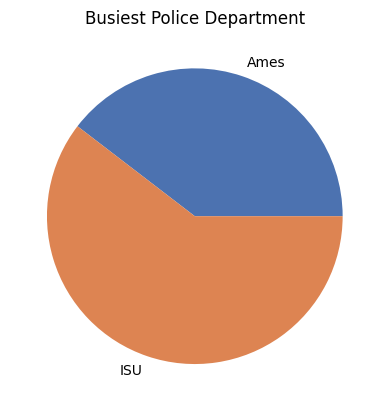

In [8]:
#group by location
pd = data.groupby(['location']).size()
color = sns.color_palette('deep')
label = ['Ames', 'ISU']

#create a pie plot
pd.plot.pie(x= pd, colors= color, labels= label, ylabel= '', title= 'Busiest Police Department')


4. Which hours of the day have the most and least breathalyzer tests?

<AxesSubplot: title={'center': 'Hours that had the most breathalyzer tests'}, xlabel='hour'>

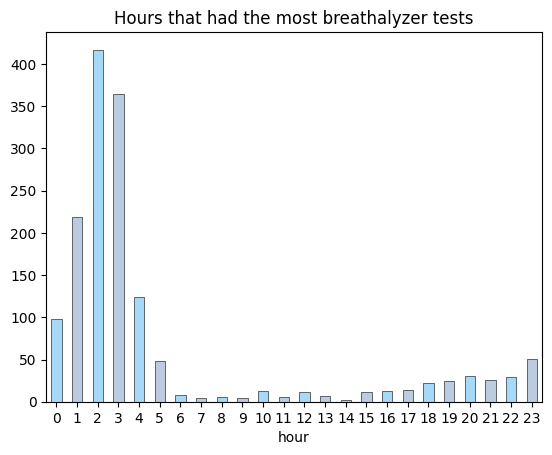

In [9]:
#group by hour
freq = data.groupby(['hour']).size()

#plot the grouped hour
freq.plot.bar(color= ['#A6D9F7','#BCCCE0'], rot = 0, title = 'Hours that had the most breathalyzer tests', edgecolor = 'black', linewidth = 0.4)


5. Total breathalyzer tests per year.

<AxesSubplot: title={'center': 'Total ocurrences per year'}>

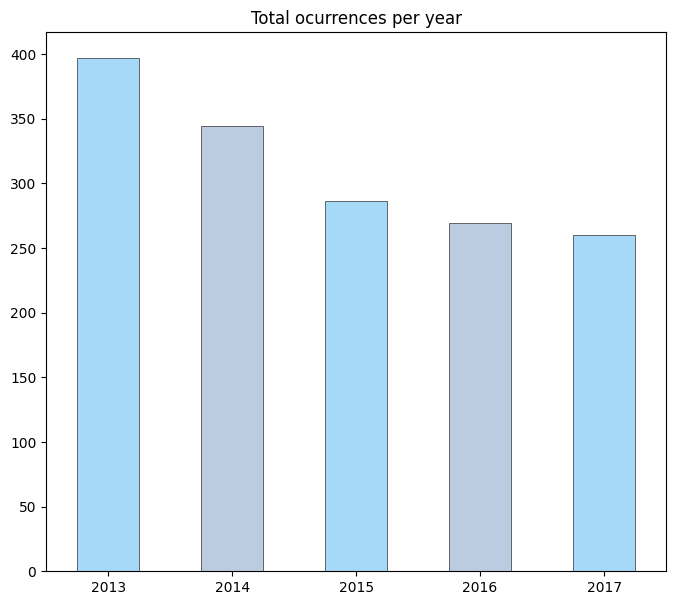

In [10]:
#group by year
group = data.groupby('year').size()

#create figure
fig, ax = plt.subplots(figsize = (8,7), label = '')

#plot the grouped years
group.plot.bar(color=['#A6D9F7','#BCCCE0'], rot = 0, edgecolor = 'black', linewidth = 0.4, xlabel = '', title= 'Total ocurrences per year')


6. A detailed view of the years

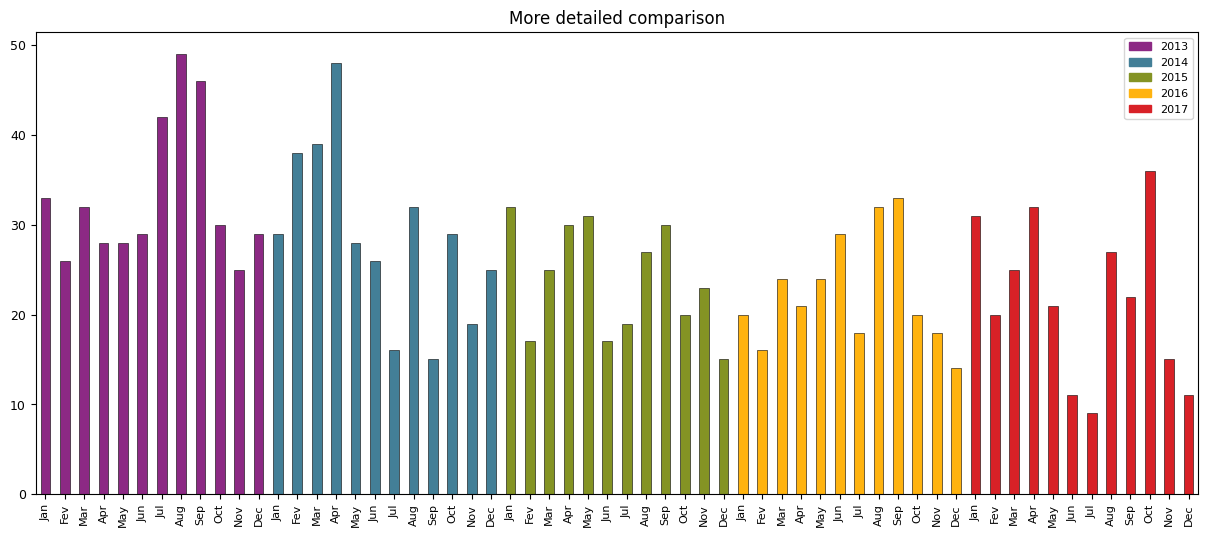

In [11]:
#set labels and colors
labels = ['Jan','Fev','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
colors = [*['#8C2984']*12,*['#437F97']*12,*['#849324']*12,*['#FFB30F']*12,*['#D82127']*12]

#group by months into years
years = data.groupby(['year','month']).size()

#create figure and plot the years
fig, ax = plt.subplots(figsize=(15,6))
years.plot.bar(color= colors, edgecolor = 'black', linewidth = 0.4, xlabel = '',title= 'More detailed comparison')

#label config
ax.set_xticklabels(labels*5)

#tick size config
ax.tick_params(axis='x', which= 'major', labelsize= 8)
ax.tick_params(axis='y', which= 'major', labelsize= 9)

#set the legends
legends = [
    mpp.Patch(color='#8C2984', label = '2013'),
    mpp.Patch(color='#437F97', label = '2014'),
    mpp.Patch(color='#849324', label = '2015'),
    mpp.Patch(color='#FFB30F', label = '2016'),
    mpp.Patch(color='#D82127', label = '2017')
]
ax.legend(handles=legends, prop={'size':8})


7. Comparing the years

[Text(1.0, 0, 'Jan'),
 Text(2.0, 0, 'Fev'),
 Text(3.0, 0, 'Mar'),
 Text(4.0, 0, 'Apr'),
 Text(5.0, 0, 'May'),
 Text(6.0, 0, 'Jun'),
 Text(7.0, 0, 'Jul'),
 Text(8.0, 0, 'Aug'),
 Text(9.0, 0, 'Sep'),
 Text(10.0, 0, 'Oct'),
 Text(11.0, 0, 'Nov'),
 Text(12.0, 0, 'Dec')]

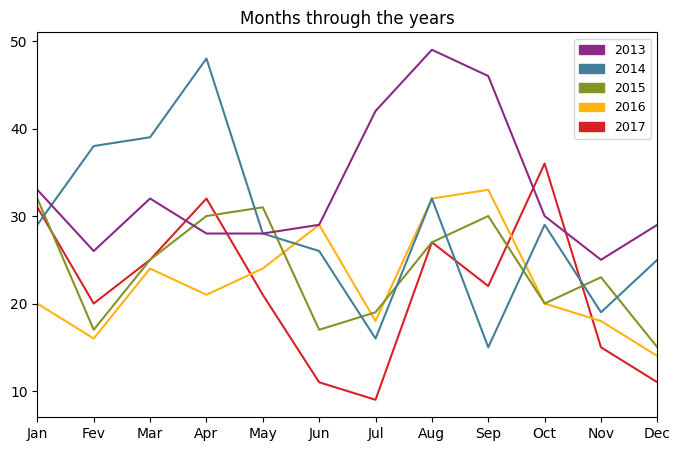

In [12]:
#create figure
fig, ax = plt.subplots(figsize=(8,5))

#create the line plot
plt.plot(data.groupby(data[data['year'] == 2017].month).size(), color = '#D82127')
plt.plot(data.groupby(data[data['year'] == 2016].month).size(), color = '#FFB30F')
plt.plot(data.groupby(data[data['year'] == 2015].month).size(), color = '#849324')
plt.plot(data.groupby(data[data['year'] == 2014].month).size(), color = '#437F97')
plt.plot(data.groupby(data[data['year'] == 2013].month).size(), color = '#8C2984')

#set figure configs
ax.set_title('Months through the years')
ax.locator_params(axis = 'x', nbins = 12)
ax.locator_params(axis = 'y', nbins = 5)
ax.set_xlim(1,12)
ax.legend(handles=legends, prop={'size':9})

#set tick labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels)

8. What does gender influence?

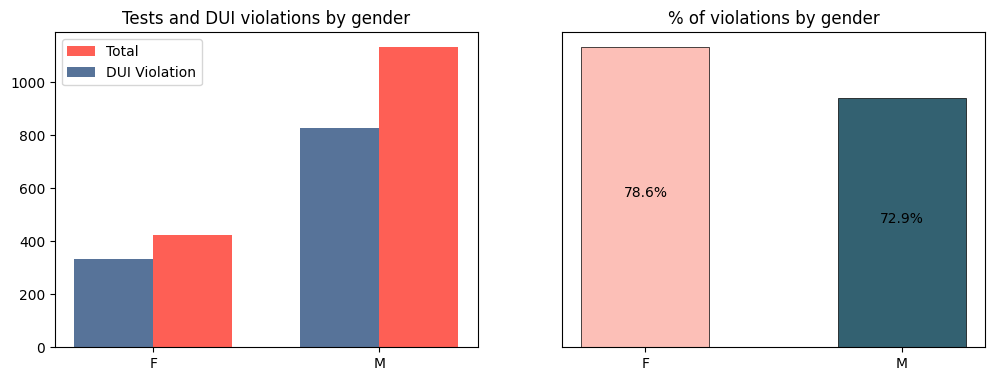

In [14]:
#create figure
plt.figure(1,figsize=(12,9))

#create the first plot space
plt.subplot(2,2,1)

#group by gender above dui limit and total tests
totalCases = data[(data['Res1'] > 0.08) | (data['Res2'] > 0.08)].groupby('gender').size()
totalTest = data.groupby('gender').size()

#set bars parameters
w = 0.35
x = ['F','M']
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

#create grouped bars plot
plt.bar(x= bar2, height= totalTest, width= w, label= 'Total', color = '#FE5F55')
plt.bar(x= bar1, height= totalCases, width= w, label= 'DUI Violation', color = '#577399')

#set plot configs
plt.title('Tests and DUI violations by gender')
plt.xticks(bar1 + w/2,x)
plt.legend()


#create the second plot space
plt.subplot(2,2,2)

#group by mans abose dui limit, total tests and get the percentage
m = data[(data['Res1'] > 0.08) & (data['gender'] == 'M') | (data['Res2'] > 0.08) & (data['gender'] == 'M')]
totalM = data[data['gender'] == 'M']
p_M = 100 * m.shape[0] / totalM.shape[0]

#group by womens abose dui limit, total tests and get the percentage
f = data[(data['Res1'] > 0.08) & (data['gender'] == 'F') | (data['Res2'] > 0.08) & (data['gender'] == 'F')]
totalF = data[data['gender'] == 'F']
p_F = 100 * f.shape[0] / totalF.shape[0]

#set bars parameters
p = [p_F,p_M]
set = [(p_F**2.5),(p_M**2.5)]
x = ['F','M']
w = 0.5

#create bar plot
plt.bar(x= x, height= set, width = w, color= ['#FCBFB7','#336171'], edgecolor = 'black',linewidth = 0.5)

#set plot config
plt.yticks([])
plt.title('% of violations by gender')
for i in range(0,2):
    plt.text(x= i + -0.085, y= set[i]/2, s= f'{p[i]:.1f}%')
